<a href="https://colab.research.google.com/github/ScottC17/IS4487/blob/main/scott_christensen_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scott Christensen

Week 8

In [9]:
import pandas as pd
import matplotlib.pyplot as mpl
import sklearn as sl

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab_Notebooks/retail_dataset.csv')

print (df)

Mounted at /content/gdrive
      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

                 state_province  pos

Which attributes have empty/null values?

In [3]:
# Check for null or empty values in each column
null_columns = df.columns[df.isnull().any()]
empty_columns = [col for col in df.columns if df[col].empty]

# Print the list of columns with null or empty values
print("Columns with null values:", null_columns)
print("Columns with empty values:", empty_columns)


Columns with null values: Index(['address_line_1', 'city', 'postal_code', 'order_date', 'quantity',
       'total_amount', 'order_year_month', 'order_month'],
      dtype='object')
Columns with empty values: []


Drop rows with null values to clean data

In [4]:
# Drop rows with null values
df = df.dropna()

# Drop columns with null values
df = df.dropna(axis=1)


Plot the total number of orders and revenue by state.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8981 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       8981 non-null   int64  
 1   customer_name     8981 non-null   object 
 2   address_line_1    8981 non-null   object 
 3   city              8981 non-null   object 
 4   state_province    8981 non-null   object 
 5   postal_code       8981 non-null   float64
 6   order_id          8981 non-null   int64  
 7   order_date        8981 non-null   object 
 8   customer_id.1     8981 non-null   int64  
 9   order_id.1        8981 non-null   int64  
 10  product_id        8981 non-null   int64  
 11  quantity          8981 non-null   float64
 12  product_id.1      8981 non-null   int64  
 13  product_name      8981 non-null   object 
 14  product_price     8981 non-null   object 
 15  total_amount      8981 non-null   object 
 16  order_year_month  8981 non-null   object 


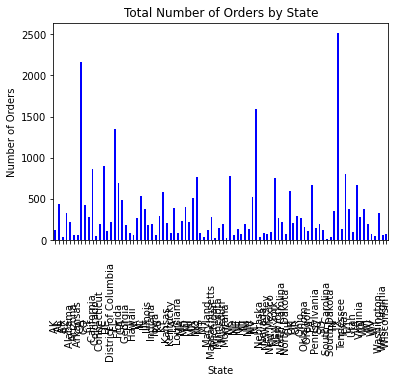

TypeError: ignored

In [11]:
grouped = df.groupby('state_province').agg({'quantity': 'sum', 'total_amount': 'sum'})

# Create a bar chart of the total number of orders by state
grouped['quantity'].plot(kind='bar', color='blue')
mpl.title('Total Number of Orders by State')
mpl.xlabel('State')
mpl.ylabel('Number of Orders')
mpl.show()

# Create a bar chart of the total revenue by state
grouped['total_amount'].plot(kind='bar', color='green')
mpl.title('Total Revenue by State')
mpl.xlabel('State')
mpl.ylabel('Revenue')
mpl.show()

Complete addresses

In [12]:
#check for non-null values in address_line_1, city, state_province, and postal_code
mask = df['address_line_1'].notnull() & df['city'].notnull() & df['state_province'].notnull() & df['postal_code'].notnull()

#filter out rows that have null values in any columns
filtered_df = df[mask]

# Count
count = filtered_df.shape[0]

# Print the count
print("Count of full addresses is: ", count)


Count of full addresses is:  8981
